In [7]:
from numpy import ones,exp
from pydrying.dry import thin_layer, material
import matplotlib.pyplot as plt

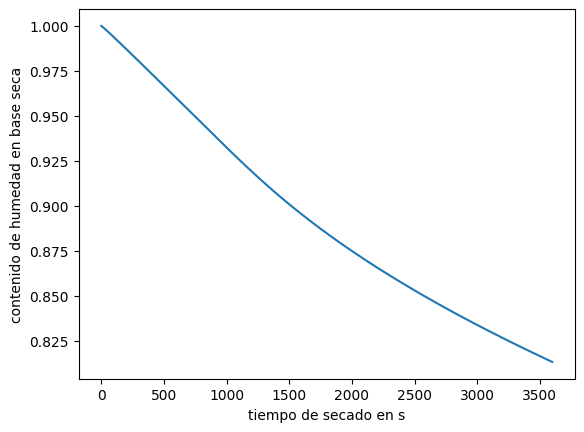

In [27]:
# Definición del coeficiente de difusión en el material


def Diff(T, X):
    #Parámetros
    #T : Temperatura [°C]
    #X : TIPO
    #Contenido de humedad [base seca]
    # Relacion de coeficientes de humedad del Agua-Material 
    #Coeficiente de difusión [m2/s]
    return 1e-9 * ones(len(T))


# Isotermas de sorción
def aw(T, X):
    """
    Parámetros
    ----------
    T : Temperatura [°C]
    X : TIPO Contenido de humedad [base seca]

    Devoluciones
    -------
    Actividad del agua del material en secado [decimal]
    """
    return (1.0 - exp(-0.6876 * (T + 45.5555) * X * X))


# Conductividad térmica del material en secado
def Lambda(T, X):
    """
    Parámetros
    ----------
    T : Temperatura [°C]
    X : TIPO
        Contenido de humedad [base seca]
    Devoluciones
    -------
    Conductividad térmica [W/m/K]
    """
    return 0.02



forma_material = 0  # material plano (1: cilindro, 2: esfera)

longitud_caracteristica = 1e-2  # m

tiempo_secado = 3600  # s

coeficiente_transferencia_calor = 25  # W/m2/K

material_secado = material(Diff=Diff, aw=aw, Lambda=Lambda,m=forma_material,L=longitud_caracteristica)

problema = thin_layer(material=material_secado, aire={},h=coeficiente_transferencia_calor,tmax=tiempo_secado)

problema.solve()


plt.plot(problema.res.t, problema.res.Xmoy)
plt.xlabel("tiempo de secado en s")
plt.ylabel("contenido de humedad en base seca")
plt.show()

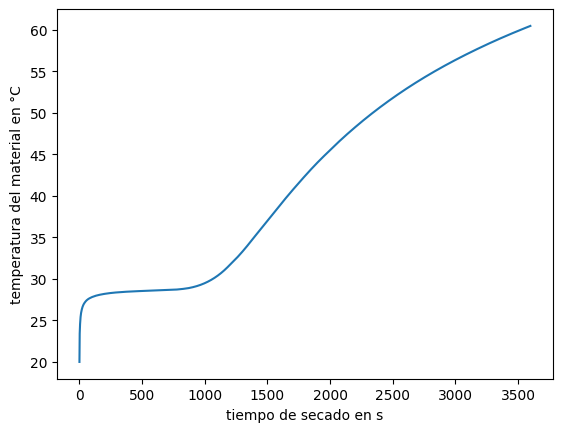

In [28]:
# Use problem.res.t y problem.res.T para graficar la temperatura del material
plt.plot(problema.res.t, problema.res.T[-1, :])
plt.xlabel("tiempo de secado en s")
plt.ylabel("temperatura del material en °C")
plt.show()